In [15]:
import os
import warnings
# warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt

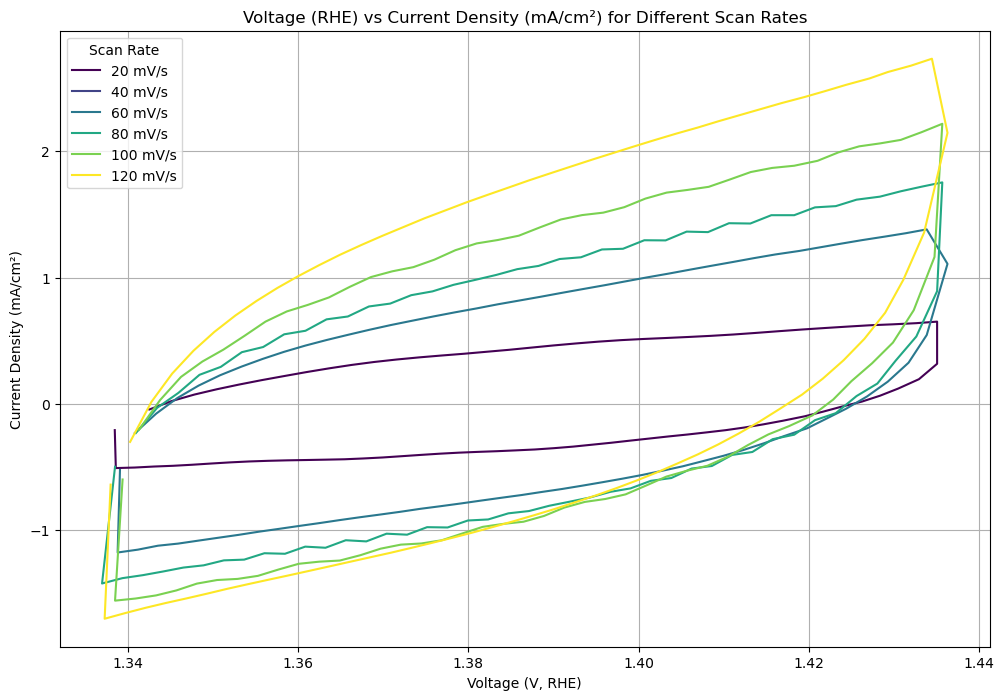

In [41]:

# 定义文件路径
file_paths = [
    "./Cdl-20.xlsx",
    "./Cdl-40.xlsx",
    "./Cdl-60.xlsx",
    "./Cdl-80.xlsx",
    "./Cdl-100.xlsx",
    "./Cdl-120.xlsx"
]

# 定义常量
electrode_area_cm2 = 1  # 电极面积，单位为cm²
voltage_shift = 0.9181  # 电压转换到RHE的偏移值

# 初始化DataFrame，用于存储每个扫描速率的概要信息
summary_df = pd.DataFrame(columns=['Scan Rate (mV/s)', 'Anodic Current Density (mA/cm²)', 'Cathodic Current Density (mA/cm²)', 'Current Density Difference (mA/cm²)'])

# 准备绘图
plt.figure(figsize=(12, 8))

# 定义渐变色数组
colors = plt.cm.viridis(np.linspace(0, 1, len(file_paths)))

# 添加用于保存每个扫描速率转换后的电压和电流数据的字典
converted_data = pd.DataFrame()

# 处理每一个文件
for idx, file_path in enumerate(file_paths):
    # 加载数据
    data = pd.read_excel(file_path)
    
    # 筛选出最后一次扫描的数据
    last_scan_number = data['Scan'].max()
    last_scan_data = data[data['Scan'] == last_scan_number].copy()
    
    # 转换电压到RHE和电流到电流密度
    last_scan_data['Voltage_RHE'] = last_scan_data['WE(1).Potential (V)'] + voltage_shift
    last_scan_data['Current_Density_mA/cm2'] = (last_scan_data['WE(1).Current (A)'] / electrode_area_cm2) * 1000
    
    # 计算电势窗口中间位置的电压
    voltage_midpoint = last_scan_data['Voltage_RHE'].mean()

    # 找出中间电压对应的两个电流密度值
    midpoint_currents = last_scan_data.iloc[(last_scan_data['Voltage_RHE']-voltage_midpoint).abs().argsort()[:2]]

    # 识别阳极和阴极电流密度
    anodic_current_density = midpoint_currents['Current_Density_mA/cm2'].max()
    cathodic_current_density = midpoint_currents['Current_Density_mA/cm2'].min()

    # 计算电流密度差
    current_density_difference = (anodic_current_density - cathodic_current_density) / 2

    # 将概要信息添加到DataFrame
    scan_rate = int(file_path.split('-')[-1].split('.')[0])  # 从文件名中提取扫描速率
    # 构造一个新的DataFrame来保存当前的扫描速率和电流密度信息
    new_row = pd.DataFrame({
        'Scan Rate (mV/s)': [scan_rate],
        'Anodic Current Density (mA/cm²)': [anodic_current_density],
        'Cathodic Current Density (mA/cm²)': [cathodic_current_density],
        'Current Density Difference (mA/cm²)': [current_density_difference]
    })

    # 使用 pandas.concat 方法将新行添加到 summary_df
    summary_df = pd.concat([summary_df, new_row], ignore_index=True)

    # 保存转换后的电压和电流数据
    # converted_data[scan_rate] = last_scan_data[['Voltage_RHE', 'Current_Density_mA/cm2']]

    # 保存转换后的电压和电流数据
    new_data = last_scan_data[['Voltage_RHE', 'Current_Density_mA/cm2']].copy()
    new_data['Scan Rate (mV/s)'] = scan_rate  # 可选：添加一个列来标记这些数据对应的扫描速率
    
    # 使用 pandas.concat 方法将新数据添加到 converted_data
    converted_data = pd.concat([converted_data, new_data], axis=1, ignore_index=False)

    # 绘制电流密度与电压的关系图
    plt.plot(last_scan_data['Voltage_RHE'], last_scan_data['Current_Density_mA/cm2'], color=colors[idx], label=f'{scan_rate} mV/s')

# 完成绘图设置
plt.title('Voltage (RHE) vs Current Density (mA/cm²) for Different Scan Rates')
plt.xlabel('Voltage (V, RHE)')
plt.ylabel('Current Density (mA/cm²)')
plt.legend(title='Scan Rate')
plt.grid(True)

# 显示图表
plt.show()

In [42]:
converted_data

,Voltage_RHE,Current_Density_mA/cm2,Scan Rate (mV/s),Voltage_RHE,Current_Density_mA/cm2,Scan Rate (mV/s),Voltage_RHE,Current_Density_mA/cm2,Scan Rate (mV/s),Voltage_RHE,Current_Density_mA/cm2,Scan Rate (mV/s),Voltage_RHE,Current_Density_mA/cm2,Scan Rate (mV/s),Voltage_RHE,Current_Density_mA/cm2,Scan Rate (mV/s)
2446,1.342538,-0.043884,20.0,NaN,NaN,NaN,1.348337,0.145538,60.0,1.343454,-0.030951,80.0,NaN,NaN,NaN,NaN,NaN,NaN
2447,1.345163,0.022772,20.0,NaN,NaN,NaN,1.350839,0.226746,60.0,1.345956,0.087555,80.0,1.341318,-0.204834,100.0,NaN,NaN,NaN
2448,1.347818,0.073975,20.0,NaN,NaN,NaN,1.353372,0.295624,60.0,1.348428,0.230469,80.0,1.343790,0.029703,100.0,NaN,NaN,NaN
2449,1.350443,0.115784,20.0,NaN,NaN,NaN,1.355875,0.356903,60.0,1.350931,0.293396,80.0,1.346262,0.214111,100.0,NaN,NaN,NaN
2450,1.353098,0.153625,20.0,NaN,NaN,NaN,1.358377,0.412781,60.0,1.353403,0.409668,80.0,1.348764,0.335449,100.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.344492,-1.575623,120.0
2531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.342111,-1.613770,120.0
2532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.339700,-1.655884,120.0
2533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.337289,-1.700439,120.0


In [45]:
summary_df

,Scan Rate (mV/s),Anodic Current Density (mA/cm²),Cathodic Current Density (mA/cm²),Current Density Difference (mA/cm²)
0,20,0.445831,-0.360626,0.403229
1,40,-0.513000,-0.513000,0.000000
2,60,0.818176,-0.721436,0.769806
3,80,1.066895,-0.848083,0.957489
4,100,1.331787,-0.932617,1.132202
5,120,1.770935,-0.928650,1.349792


In [46]:
summary_df['Scan Rate (mV/s)']

0     20
1     40
2     60
3     80
4    100
5    120
Name: Scan Rate (mV/s), dtype: object

In [49]:
type(summary_df['Scan Rate (mV/s)'][0])

int

In [47]:
summary_df['Current Density Difference (mA/cm²)']

0    0.403229
1    0.000000
2    0.769806
3    0.957489
4    1.132202
5    1.349792
Name: Current Density Difference (mA/cm²), dtype: float64

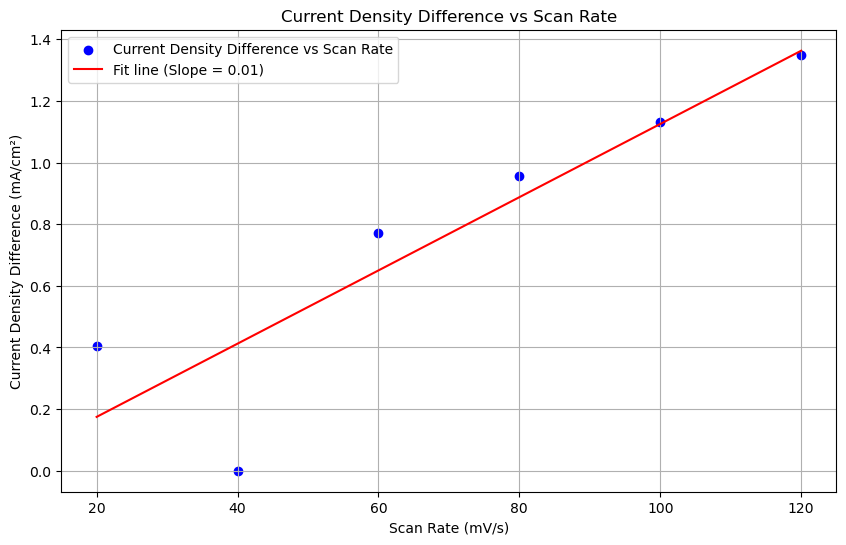

In [51]:
# 绘制电流密度差相对于扫描速率的散点图
plt.figure(figsize=(10, 6))
plt.scatter(summary_df['Scan Rate (mV/s)'], summary_df['Current Density Difference (mA/cm²)'], color='blue', label='Current Density Difference vs Scan Rate')

# 确保'Scan Rate (mV/s)'和'Current Density Difference (mA/cm²)'列是数值类型
summary_df['Scan Rate (mV/s)'] = pd.to_numeric(summary_df['Scan Rate (mV/s)'], errors='coerce')
summary_df['Current Density Difference (mA/cm²)'] = pd.to_numeric(summary_df['Current Density Difference (mA/cm²)'], errors='coerce')

# 删除包含NaN值的行
summary_df = summary_df.dropna()

# 进行线性拟合以求双电层电容
slope, intercept = np.polyfit(summary_df['Scan Rate (mV/s)'], summary_df['Current Density Difference (mA/cm²)'], 1)
plt.plot(summary_df['Scan Rate (mV/s)'], slope*summary_df['Scan Rate (mV/s)'] + intercept, color='red', label=f'Fit line (Slope = {slope:.2f})')

# 完成绘图设置
plt.title('Current Density Difference vs Scan Rate')
plt.xlabel('Scan Rate (mV/s)')
plt.ylabel('Current Density Difference (mA/cm²)')
plt.legend()
plt.grid(True)

# 显示图表
plt.show()

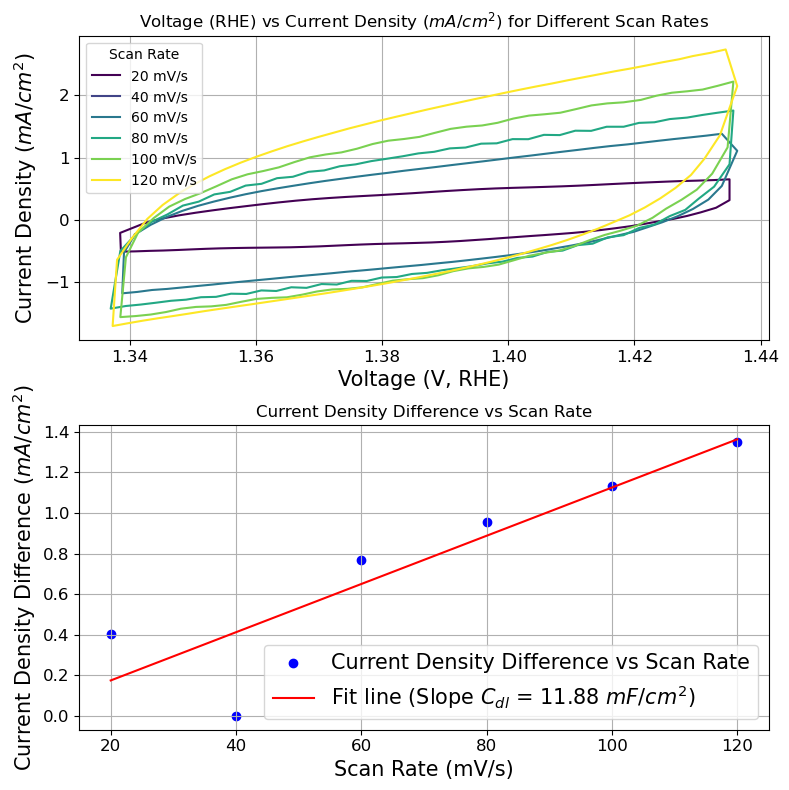

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义文件路径
file_paths = [
    "./Cdl-20.xlsx",
    "./Cdl-40.xlsx",
    "./Cdl-60.xlsx",
    "./Cdl-80.xlsx",
    "./Cdl-100.xlsx",
    "./Cdl-120.xlsx"
]

# 定义常量
electrode_area_cm2 = 1  # 电极面积，单位为cm²
voltage_shift = 0.9181  # 电压转换到RHE的偏移值

# 初始化DataFrame，用于存储每个扫描速率的概要信息
summary_df = pd.DataFrame(columns=['Scan Rate (mV/s)', 'Anodic Current Density (mA/cm²)', 'Cathodic Current Density (mA/cm²)', 'Current Density Difference (mA/cm²)'])

# 准备绘图，创建两行一列的子图布局
fig, axes = plt.subplots(2, 1, figsize=(8, 8))  # 创建两行一列的子图，分配给axes

# 定义渐变色数组
colors = plt.cm.viridis(np.linspace(0, 1, len(file_paths)))

# 添加用于保存每个扫描速率转换后的电压和电流数据的字典
converted_data = pd.DataFrame()

# 处理每一个文件
for idx, file_path in enumerate(file_paths):
    # 加载数据
    data = pd.read_excel(file_path)
    
    # 筛选出最后一次扫描的数据
    last_scan_number = data['Scan'].max()
    last_scan_data = data[data['Scan'] == last_scan_number].copy()
    
    # 转换电压到RHE和电流到电流密度
    last_scan_data['Voltage_RHE'] = last_scan_data['WE(1).Potential (V)'] + voltage_shift
    last_scan_data['Current_Density_mA/cm2'] = (last_scan_data['WE(1).Current (A)'] / electrode_area_cm2) * 1000
    
    # 计算电势窗口中间位置的电压
    voltage_midpoint = last_scan_data['Voltage_RHE'].mean()

    # 找出中间电压对应的两个电流密度值
    midpoint_currents = last_scan_data.iloc[(last_scan_data['Voltage_RHE']-voltage_midpoint).abs().argsort()[:2]]

    # 识别阳极和阴极电流密度
    anodic_current_density = midpoint_currents['Current_Density_mA/cm2'].max()
    cathodic_current_density = midpoint_currents['Current_Density_mA/cm2'].min()

    # 计算电流密度差
    current_density_difference = (anodic_current_density - cathodic_current_density) / 2

    # 将概要信息添加到DataFrame
    scan_rate = int(file_path.split('-')[-1].split('.')[0])  # 从文件名中提取扫描速率
    # 构造一个新的DataFrame来保存当前的扫描速率和电流密度信息
    new_row = pd.DataFrame({
        'Scan Rate (mV/s)': [scan_rate],
        'Anodic Current Density (mA/cm²)': [anodic_current_density],
        'Cathodic Current Density (mA/cm²)': [cathodic_current_density],
        'Current Density Difference (mA/cm²)': [current_density_difference]
    })

    # 使用 pandas.concat 方法将新行添加到 summary_df
    summary_df = pd.concat([summary_df, new_row], ignore_index=True)

    # 保存转换后的电压和电流数据
    # converted_data[scan_rate] = last_scan_data[['Voltage_RHE', 'Current_Density_mA/cm2']]

    # 保存转换后的电压和电流数据
    new_data = last_scan_data[['Voltage_RHE', 'Current_Density_mA/cm2']].copy()
    new_data['Scan Rate (mV/s)'] = scan_rate  # 可选：添加一个列来标记这些数据对应的扫描速率
    
    # 使用 pandas.concat 方法将新数据添加到 converted_data
    converted_data = pd.concat([converted_data, new_data], axis=1, ignore_index=False)

    # 复制第一行并添加到DataFrame的末尾用于绘制闭合曲线
    last_scan_data = pd.concat([last_scan_data, last_scan_data.iloc[[0]]], ignore_index=True)

    # 绘制第一幅图：电流密度与电压的关系图
    axes[0].plot(last_scan_data['Voltage_RHE'], last_scan_data['Current_Density_mA/cm2'], color=colors[idx], label=f'{scan_rate} mV/s')

# 完成第一幅图的设置
axes[0].set_title('Voltage (RHE) vs Current Density ($mA/cm^2$) for Different Scan Rates')
axes[0].set_xlabel('Voltage (V, RHE)', fontsize=15)
axes[0].set_ylabel('Current Density ($mA/cm^2$)', fontsize=15)
axes[0].legend(title='Scan Rate')
axes[0].grid(True)
# 设置刻度标签字号
axes[0].tick_params(axis='both', which='major', labelsize=12)

# 确保'Scan Rate (mV/s)'和'Current Density Difference (mA/cm²)'列是数值类型
summary_df['Scan Rate (mV/s)'] = pd.to_numeric(summary_df['Scan Rate (mV/s)'], errors='coerce')
summary_df['Current Density Difference (mA/cm²)'] = pd.to_numeric(summary_df['Current Density Difference (mA/cm²)'], errors='coerce')

# 删除包含NaN值的行
summary_df = summary_df.dropna()

# 进行线性拟合以求双电层电容
slope, intercept = np.polyfit(summary_df['Scan Rate (mV/s)'], summary_df['Current Density Difference (mA/cm²)'], 1)

# 绘制第二幅图：电流密度差相对于扫描速率的散点图和拟合直线
axes[1].scatter(summary_df['Scan Rate (mV/s)'], summary_df['Current Density Difference (mA/cm²)'], color='blue', label='Current Density Difference vs Scan Rate')
axes[1].plot(summary_df['Scan Rate (mV/s)'], 
             slope*summary_df['Scan Rate (mV/s)'] + intercept, 
             color='red', 
             label=f'Fit line (Slope $C_{{dl}}$ = {slope*1000:.2f} $mF/cm^2$)')

# 完成第二幅图的设置
axes[1].set_title('Current Density Difference vs Scan Rate')
axes[1].set_xlabel('Scan Rate (mV/s)', fontsize=15)
axes[1].set_ylabel('Current Density Difference ($mA/cm^2$)', fontsize=15)
axes[1].legend(fontsize=15)
axes[1].grid(True)
# 设置刻度标签字号
axes[1].tick_params(axis='both', which='major', labelsize=12)

# 显示整个图表
plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域。
plt.show()

In [9]:
# data = pd.read_excel('./CV Activation.xlsx', header=0, index_col='Scan') # 加载数据
data = pd.read_excel('./CV Activation.xlsx', header=0, index_col=None) # 加载数据
data

,Potential applied (V),Time (s),WE(1).Current (A),WE(1).Potential (V),Scan,Index,Q+,Q-,Current range,Overload,User events
0,0.005035,3.876536,-0.005591,0.005203,1,1,0.028160,-0.035848,10 mA,NaN,NaN
1,0.010071,3.977244,-0.005276,0.010217,1,2,0.028160,-0.035848,10 mA,NaN,NaN
2,0.015106,4.077952,-0.004967,0.015344,1,3,0.028160,-0.035848,10 mA,NaN,NaN
3,0.020142,4.178660,-0.004677,0.020364,1,4,0.028160,-0.035848,10 mA,NaN,NaN
4,0.025177,4.279368,-0.004398,0.025320,1,5,0.028160,-0.035848,10 mA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4797,0.010071,486.972811,-0.010220,0.010315,20,4798,0.085524,-0.089121,100 mA,NaN,NaN
4798,0.005035,487.073519,-0.009476,0.005215,20,4799,0.085524,-0.089121,100 mA,NaN,NaN
4799,0.000000,487.174227,-0.009152,0.000180,20,4800,0.085524,-0.089121,100 mA,NaN,NaN
4800,0.005035,487.274935,-0.008084,0.005139,20,4801,0.085524,-0.089121,100 mA,NaN,NaN


In [10]:
data['Scan'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int64)

C:\Users\Carlo\AppData\Local\Temp\ipykernel_19104\3918327517.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(scans))


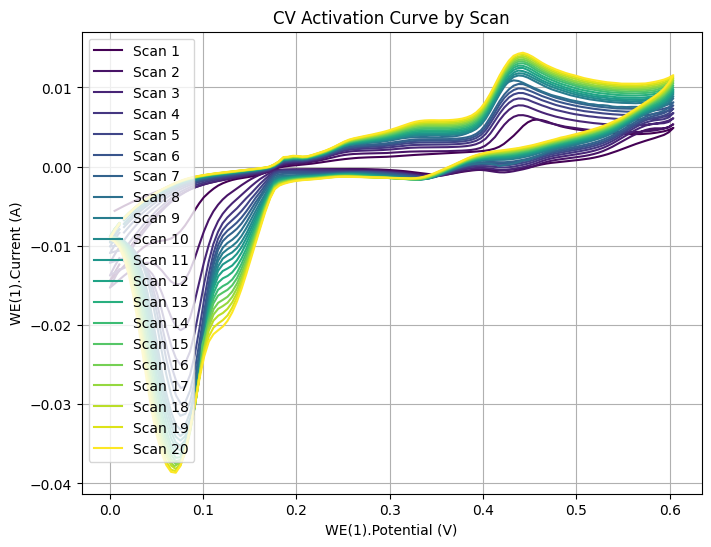

In [18]:
# 由于数据是循环的，我们可以使用颜色渐变来区分每个循环
# 首先，我们需要确定循环的数量
data = pd.read_excel('./CV Activation.xlsx', header=0, index_col=None) # 加载数据

# 计算不同扫描（Scan）的数量
scans = data['Scan'].unique()

# 准备绘图
plt.figure(figsize=(8, 6))

# 定义颜色映射
color_map = plt.cm.get_cmap('viridis', len(scans))

# 按扫描编号绘制每一圈的数据
for i, scan in enumerate(scans):
    scan_data = data[data['Scan'] == scan]
    plt.plot(scan_data['WE(1).Potential (V)'], scan_data['WE(1).Current (A)'],
             label=f'Scan {scan}',
             color=color_map(i))

plt.xlabel('WE(1).Potential (V)')
plt.ylabel('WE(1).Current (A)')
plt.title('CV Activation Curve by Scan')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
from matplotlib import cm
from matplotlib import colormaps as cm
color_map = cm.get_cmap('viridis', len(scans))

C:\Users\Carlo\AppData\Local\Temp\ipykernel_19104\4171736326.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('viridis', len(scans))


In [32]:
import os

# 假设这是您的文件路径
file_path = "C:/Users/Carlo/Desktop/电化学后处理/data.xlsx"

# 使用 os.path.basename 来获取文件名
file_name = os.path.basename(file_path)

print(file_name)


data.xlsx


In [33]:
import os

# 假设这是您的文件路径
file_path = "C:/Users/Carlo/Desktop/电化学后处理/data.xlsx"

# 获取最后一个部分（文件名或最末级文件夹名）
last_part = os.path.basename(file_path)

# 获取倒数第二个部分（上级目录名）
second_last_part = os.path.basename(os.path.dirname(file_path))

print("最后一个部分:", last_part)
print("倒数第二个部分:", second_last_part)


最后一个部分: data.xlsx
倒数第二个部分: 电化学后处理


In [34]:
data = pd.read_excel('./Cdl-40.xlsx', header=0, index_col=None)
data.head()

,Scan,Index,Time (s),WE(1).Potential (V),WE(1).Current (A),Current range
0,1,1,5.850165,0.423035,0.007669,1 mA
1,1,2,5.911165,0.425568,0.007415,1 mA
2,1,3,5.972165,0.428101,0.007304,1 mA
3,1,4,6.033165,0.430634,0.007226,1 mA
4,1,5,6.094165,0.433167,0.007153,1 mA


In [36]:
data['Scan'].max()-1

31

In [37]:
# 筛选出最后一次扫描的数据
last_scan_number = data['Scan'].max() - 1
last_scan_data = data[data['Scan'] == last_scan_number].copy()
last_scan_data

,Scan,Index,Time (s),WE(1).Potential (V),WE(1).Current (A),Current range
2443,31,2444,154.873165,0.422821,-0.000180,NaN
2444,31,2445,154.934165,0.425354,-0.000068,NaN
2445,31,2446,154.995165,0.427887,0.000021,NaN
2446,31,2447,155.056165,0.430420,0.000090,NaN
2447,31,2448,155.117165,0.432983,0.000147,NaN
...,...,...,...,...,...,...
2518,31,2519,159.448165,0.429840,-0.000802,NaN
2519,31,2520,159.509165,0.427490,-0.000816,NaN
2520,31,2521,159.570165,0.425171,-0.000826,NaN
2521,31,2522,159.631165,0.422821,-0.000847,NaN
